# Entropy maps or voxets as a local measure of uncertainty
Here we use Shanon's entropy (See https://en.wikipedia.org/wiki/Entropy_(information_theory)).

In [1]:
# import modules
from matplotlib import pyplot as plt
# import numpy as np
from datetime import datetime
import pickle
from uncertaintyIndicators import entropy,entropyNcardinality,continuous_entropy

picklefilenamedata = "./pickledata/testing-model-subset.pickle"
picklefilenameentropy = "./pickledata/testing-model-subset-entropy.pickle"

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

## Categorical variable
The definition of Shanon's entropy is valid for discrete variables. 

In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING ENTROPY START")
ent = entropy(mod_all)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING ENTROPY END")

03-Jun-2021 (22:37:00) - COMPUTING ENTROPY START
03-Jun-2021 (22:37:11) - COMPUTING ENTROPY END


## Continuous variable
In the continuous case, one need to discretize the continuous domain and integrate with the width of the bins.
See paper of C. Marsh at https://www.crmarsh.com/static/pdf/Charles_Marsh_Continuous_Entropy.pdf

Here we discretize the support of the continuous variable in regular bins 
Ideally the width DELTAx of the bins converge toward zero and apply  Shanon entropy as p(x) = f(x)*DELTAx


In [3]:
nbins=50
# AND NOW for DENSITY
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY DENSITY START")
ent_rho = continuous_entropy(rho_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY DENSITY END")

# AND NOW for MAGNETIC SUSCEPTIBILITY
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY START")
ent_sus = continuous_entropy(sus_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY END")

# AND NOW for MAGNETIC RESPONSE
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE START")
ent_mag = continuous_entropy(mag_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE END")

# AND NOW for GRAVITY RESPONSE
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE START")
ent_grv = continuous_entropy(grv_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE END")


03-Jun-2021 (22:37:16) - COMPUTING CONTINUOUS ENTROPY DENSITY START
03-Jun-2021 (22:38:07) - COMPUTING CONTINUOUS ENTROPY DENSITY END
03-Jun-2021 (22:38:07) - COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY START
03-Jun-2021 (22:38:38) - COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY END
03-Jun-2021 (22:38:38) - COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE START
03-Jun-2021 (22:38:38) - COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE END
03-Jun-2021 (22:38:38) - COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE START
03-Jun-2021 (22:38:38) - COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE END


## Plot

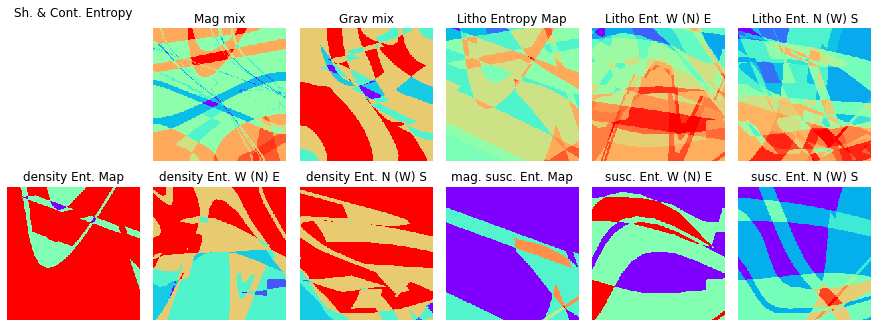

In [4]:
# PLOT DISCRETE AND CONTINUOUS ENTROPY
fig, ax = plt.subplots(2,6) #,figsize=(13,13)
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')
ax[0,4].axis('off')
ax[0,5].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
ax[1,3].axis('off')
ax[1,4].axis('off')
ax[1,5].axis('off')
ax[0,0].set_title('Sh. & Cont. Entropy' )
ax[0,1].set_title('Mag mix' ) #title.set_text
ax[0,2].set_title('Grav mix')
ax[0,3].set_title('Litho Entropy Map')
ax[0,4].set_title('Litho Ent. W (N) E')
ax[0,5].set_title('Litho Ent. N (W) S')
ax[1,0].set_title('density Ent. Map')
ax[1,1].set_title('density Ent. W (N) E')
ax[1,2].set_title('density Ent. N (W) S')
ax[1,3].set_title('mag. susc. Ent. Map')
ax[1,4].set_title('susc. Ent. W (N) E')
ax[1,5].set_title('susc. Ent. N (W) S')
ax[0,1].imshow(ent_mag,cmap='rainbow')
ax[0,2].imshow(ent_grv,cmap='rainbow')
ax[0,3].imshow(ent[0,:,:],cmap='rainbow')
ax[0,4].imshow(ent[:,0,:],cmap='rainbow')
ax[0,5].imshow(ent[:,:,0],cmap='rainbow')
ax[1,0].imshow(ent_rho[0,:,:],cmap='rainbow')
ax[1,1].imshow(ent_rho[:,0,:],cmap='rainbow')
ax[1,2].imshow(ent_rho[:,:,0],cmap='rainbow')
ax[1,3].imshow(ent_sus[0,:,:],cmap='rainbow')
ax[1,4].imshow(ent_sus[:,0,:],cmap='rainbow')
ax[1,5].imshow(ent_sus[:,:,0],cmap='rainbow')
fig.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.05, wspace=0.1, hspace=0.1)
plt.show()

## Save computed indicators

In [ ]:
with open(picklefilenameentropy, 'wb') as f:
    pickle.dump([ent_grv,ent_mag,ent,ent_rho,ent_sus], f)